Cauchy task solution (p. 69, ex. 8.6)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint

plt.style.use('seaborn')

# Function investigation 

We are given this Cauchy task: $$y' = \cos{(1.75x + y)} + 1.25(x − y), \,y(0) = 0.$$

In [2]:
def f_derivative(x, y):
    return np.cos(1.75*x + y) + 1.25*(x - y)

x0 = 0
y0 = 0

# Euler method 

In [3]:
def euler_left(f, xs, y0, h):
    '''Counts y values for xs to solve Cauchy task with left rectangles.
    
    Args:
        f (func): Function that we are integrating to solve task.
        xs (list<float>): Points in which we counting values.
        y0: (float): Initial point.
        h (float): Step.
        
    Returns:
        ys (list<float>): List with function values.
    '''
    
    ys = []    
    ys.append(y0)
    
    for i in range(1, len(xs)):
        y_m = ys[i - 1] + h * f(xs[i - 1], ys[i - 1])
        ys.append(y_m)

    return np.array(ys)

In [4]:
def euler_middle(f, xs, y0, h, twice_points=False):
    '''Counts y values for xs to solve Cauchy task with middle rectangles.
    
    Args:
        f (func): Function that we are integrating to solve task.
        xs (list<float>): Points in which we counting values.
        y0: (float): Initial point.
        h (float): Step.
        twice_points (bool): Flag if we have a better accuracy algorithm 
                             (twice points and step divided by 2).
        
    Returns:
        ys (list<float>): List with function values.
    '''
    
    ys = []    
    ys.append(y0)
    
    for i in range(1, len(xs)):
        y_m = ys[i - 1] + h * f(xs[i - 1] + (h / 2.), ys[i - 1] + (h / 2.) * f(xs[i - 1], ys[i - 1]))
        ys.append(y_m)

    if twice_points:
        return np.array(ys[::2]) 
    else:
        return np.array(ys) 

In [5]:
# Points.
xs = np.linspace(0, 0.5, 11)

# Twice as much points for better accuracy euler method.
xs_2 = np.linspace(0, 0.5, 21)

# Step value.
h = xs[1] - xs[0]

# Exact values.
y_math = odeint(f_derivative, y0, xs, tfirst=True).T[0]

# Values from Euler's middle rectangles method.
y_h = euler_middle(f_derivative, xs, y0, h)

# Values from Euler's middle rectangles method
# with half step and twice as much points.
y_h_2 = euler_middle(f_derivative, xs_2, y0, h/2., True)

# Richardson extrapolation.
R_main = (y_h_2 - y_h) / (2**2 - 1)
y_rev = y_h_2 + R_main

# Error rate.
y_rev_y_math = y_rev - y_math

In [6]:
# Initializing DataFrame.
df = pd.DataFrame()
df["$x$"] = xs
df["$y_{math}$"] = y_math
df["$y^h$"] = y_h
df["$y^{h/2}$"] = y_h_2
df["$y_{rev}$"] = y_rev
df["$y_{rev} - y_{math}$"] = y_rev_y_math

display(df.style.hide_index())

$x$,$y_{math}$,$y^h$,$y^{h/2}$,$y_{rev}$,$y_{rev} - y_{math}$
0,0,0,0,0,0
0.05,0.0498453,0.0498819,0.0498539,0.0498446,-6.8624e-07
0.1,0.0987892,0.0988476,0.0988029,0.098788,-1.23878e-06
0.15,0.14602,0.146085,0.146035,0.146019,-1.63104e-06
0.2,0.190851,0.190906,0.190863,0.190849,-1.81853e-06
0.25,0.232733,0.232766,0.23274,0.232732,-1.80191e-06
0.3,0.271268,0.271267,0.271267,0.271267,-1.56073e-06
0.35,0.306201,0.306159,0.306189,0.3062,-1.15509e-06
0.4,0.337408,0.337323,0.337386,0.337408,-6.11706e-07
0.45,0.364886,0.364755,0.364853,0.364885,-8.539e-09


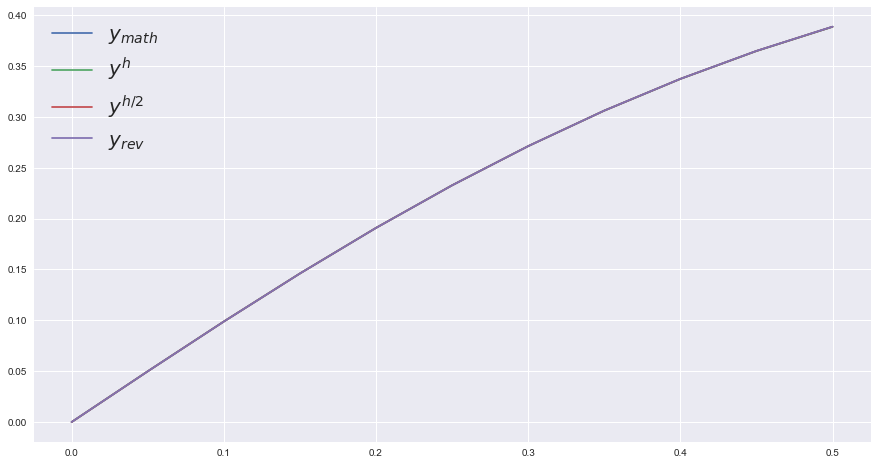

In [7]:
plt.figure(figsize=(15,8))

for column in df.columns[1:-1]:
    plt.plot(df["$x$"], df[column], label=column)

plt.legend(fontsize=20)
plt.show()

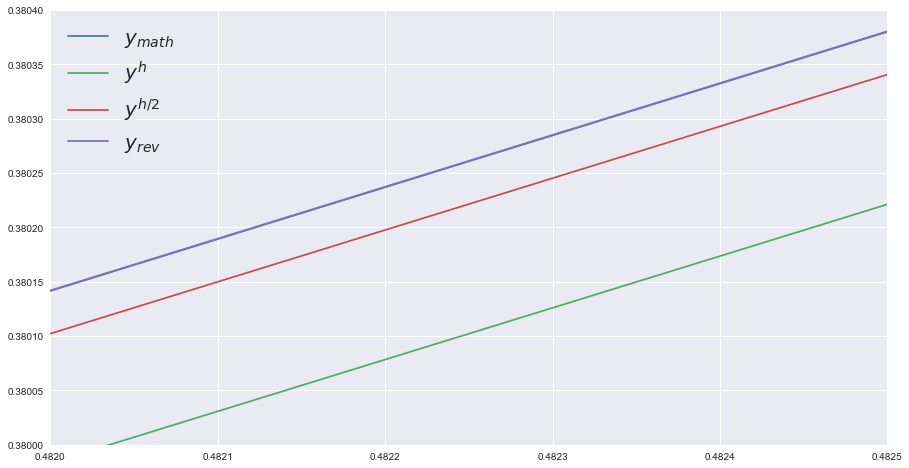

In [8]:
plt.figure(figsize=(15,8))

for column in df.columns[1:-1]:
    plt.plot(df["$x$"], df[column], label=column)

plt.xlim(0.482, 0.4825)
plt.ylim(0.38, 0.3804)
plt.legend(fontsize=20)
plt.show()

# Runge–Kutta method 

In [9]:
def runge_kutta(f, xs, y0, h):
    '''Counts y values for xs to solve Cauchy task with middle rectangles.
    
    Args:
        f (func): Function that we are integrating to solve task.
        xs (list<float>): Points in which we counting values.
        y0: (float): Initial point.
        h (float): Step.
        
    Returns:
        ys (list<float>): List with function values.
    '''
    
    ys = []    
    ys.append(y0)
    
    for i in range(1, len(xs)):
        
        k1 = h * f(xs[i - 1], ys[i - 1])
        k2 = h * f(xs[i - 1] + (h / 2), ys[i - 1] + (k1 / 2))
        k3 = h * f(xs[i - 1] + (h / 2), ys[i - 1] + (k2 / 2))
        k4 = h * f(xs[i - 1] + h, ys[i - 1] + k3)
        
        y_m = ys[i - 1] + (1 / 6) * (k1 + 2*k2 + 2*k3 + k4)
        ys.append(y_m)

    return np.array(ys) 

In [10]:
# Values from Euler's left rectangles method.
y_RK = runge_kutta(f_derivative, xs, y0, h)

# Error rate.
y_math_y_RK = y_math - y_RK

# Adams methods 

## Extrapolation method 

In [11]:
def adams_extrapolation(f, xs, ys, h):
    '''Counts y values for xs to solve Cauchy task with adams extrapolation.
    
    Args:
        f (func): Function that we are integrating to solve task.
        xs (list<float>): Points in which we counting values.
        ys: (list<float>): Solutions for this point from runge kutta method. 
        h (float): Step.         
        
    Returns:
        ys_adams (list<float>): List with function values.
    '''
    
    qs = [h * f(xs[i], ys[i]) for i in range(len(xs))]
    
    ys_adams = list(ys[:5])
        
    for i in range(5, len(xs)):
        
        ys_adams.append(ys_adams[i-1] + (1 / 720.) * (1901 * qs[i-1] - \
                                                      2774 * qs[i-2] + \
                                                      2616 * qs[i-3] - \
                                                      1274 * qs[i-4] + \
                                                      251  * qs[i-5]
                                                     ))
            
    return np.array(ys_adams)

In [12]:
# Values from Adam's extrapolation method.
y_Ad_ex = adams_extrapolation(f_derivative, xs, y_RK, h)

# Error rate.
y_math_y_Ad_ex = y_math - y_Ad_ex

## Interpolation method 

In [13]:
def adams_interpolation(f, xs, ys, h):
    '''Counts y values for xs to solve Cauchy task with adams interpolation.
    
    Args:
        f (func): Function that we are integrating to solve task.
        xs (list<float>): Points in which we counting values.
        ys: (list<float>): Solutions for this point from runge kutta method.
        h (float): Step.         
        
    Returns:
        ys_adams (list<float>): List with function values.
    '''
    
    qs = [h * f(xs[i], ys[i]) for i in range(len(xs))]
    
    ys_adams = list(ys[:5])
        
    for i in range(5, len(xs)):
        
        ys_adams.append(ys_adams[i-1] + (1 / 720.) * (251 * qs[i]   + \
                                                      646 * qs[i-1] - \
                                                      264 * qs[i-2] + \
                                                      106 * qs[i-3] - \
                                                      19  * qs[i-4]
                                                     ))
            
    return np.array(ys_adams)

In [14]:
# Values from Adam's extrapolation method.
y_Ad_in = adams_interpolation(f_derivative, xs, y_RK, h)

# Error rate.
y_math_y_Ad_in = y_math - y_Ad_in

# Building table 

In [15]:
# Initializing DataFrame.
df = pd.DataFrame()
df["$x$"] = xs
df["$y_{math}$"] = y_math
df["$y_{RK}$"] = y_RK
df["$y_{Ad}^{ex}$"] = y_Ad_ex
df["$y_{Ad}^{in}$"] = y_Ad_in
df["$y_{math}$ $-$ $y_{RK}$"] = y_math_y_RK
df["$y_{math}$ $-$ $y_{Ad}^{ex}$"] = y_math_y_Ad_ex
df["$y_{math}$ $-$ $y_{Ad}^{in}$"] = y_math_y_Ad_in

display(df.style.hide_index())

$x$,$y_{math}$,$y_{RK}$,$y_{Ad}^{ex}$,$y_{Ad}^{in}$,$y_{math}$ $-$ $y_{RK}$,$y_{math}$ $-$ $y_{Ad}^{ex}$,$y_{math}$ $-$ $y_{Ad}^{in}$
0,0,0,0,0,0,0,0
0.05,0.0498453,0.0498452,0.0498452,0.0498452,4.31727e-08,4.31727e-08,4.31727e-08
0.1,0.0987892,0.0987891,0.0987891,0.0987891,6.27965e-08,6.27965e-08,6.27965e-08
0.15,0.14602,0.14602,0.14602,0.14602,8.5569e-08,8.5569e-08,8.5569e-08
0.2,0.190851,0.190851,0.190851,0.190851,1.02962e-07,1.02962e-07,1.02962e-07
0.25,0.232733,0.232733,0.232737,0.232733,1.28821e-07,-3.57759e-06,2.9672e-07
0.3,0.271268,0.271268,0.271276,0.271268,1.32499e-07,-7.21457e-06,4.36683e-07
0.35,0.306201,0.306201,0.306211,0.3062,1.44303e-07,-1.03086e-05,5.36899e-07
0.4,0.337408,0.337408,0.337421,0.337408,1.48101e-07,-1.25977e-05,5.76835e-07
0.45,0.364886,0.364885,0.364899,0.364885,1.73277e-07,-1.39723e-05,5.90986e-07
